In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('octavos_df.csv')

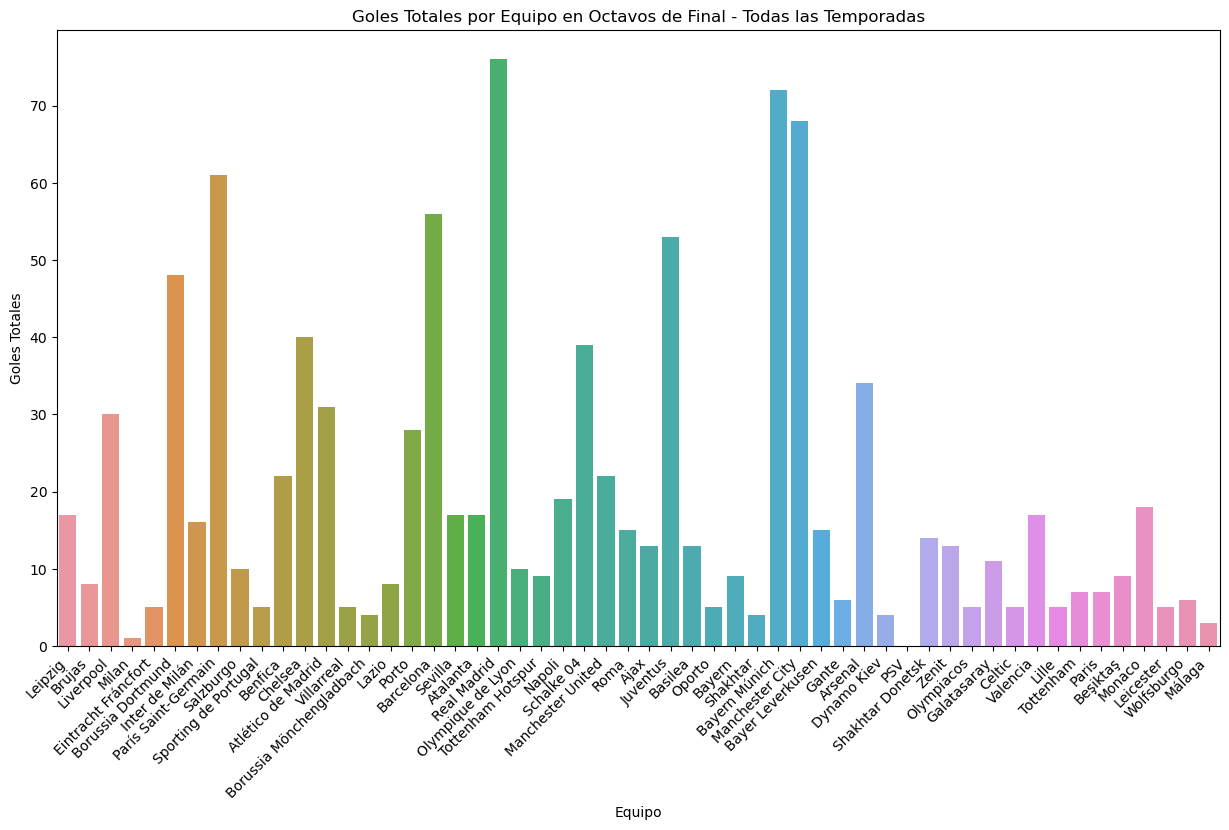

In [3]:
'''Gráfico de barras de los goles totales por equipo y temporada'''

# Crear una lista con los nombres únicos de los equipos en las columnas 'Equipo 1' y 'Equipo 2'
equipos_unicos = pd.unique(df[['Equipo 1', 'Equipo 2']].values.ravel('K'))

# Inicializar un DataFrame para almacenar los goles totales por equipo
goles_totales_por_equipo = pd.DataFrame(columns=['Equipo', 'Goles_totales'])

# Iterar sobre cada equipo único
for equipo in equipos_unicos:
    # Filtrar las filas donde el equipo está en 'Equipo 1'
    filas_equipo_1 = df[df['Equipo 1'] == equipo]
    goles_totales_1 = filas_equipo_1[['goles_1', 'goles_2']].sum().sum()

    # Filtrar las filas donde el equipo está en 'Equipo 2'
    filas_equipo_2 = df[df['Equipo 2'] == equipo]
    goles_totales_2 = filas_equipo_2[['goles_1', 'goles_2']].sum().sum()

    # Concatenar los resultados en el DataFrame
    goles_totales_por_equipo = pd.concat([goles_totales_por_equipo,
                                          pd.DataFrame({'Equipo': [equipo],
                                                        'Goles_totales': [goles_totales_1 + goles_totales_2]})])

# Graficar los goles totales por equipo
plt.figure(figsize=(15, 8))
sns.barplot(x='Equipo', y='Goles_totales', data=goles_totales_por_equipo)
plt.title('Goles Totales por Equipo en Octavos de Final - Todas las Temporadas')
plt.xlabel('Equipo')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/98/7bgvzcwx7tz2bgwyh060mq100000gn/T/ipykernel_66111/1228662195.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Equipo', y='Goles_totales', hue='Ida_Vuelta', data=goles_totales_por_equipo, ci=None)


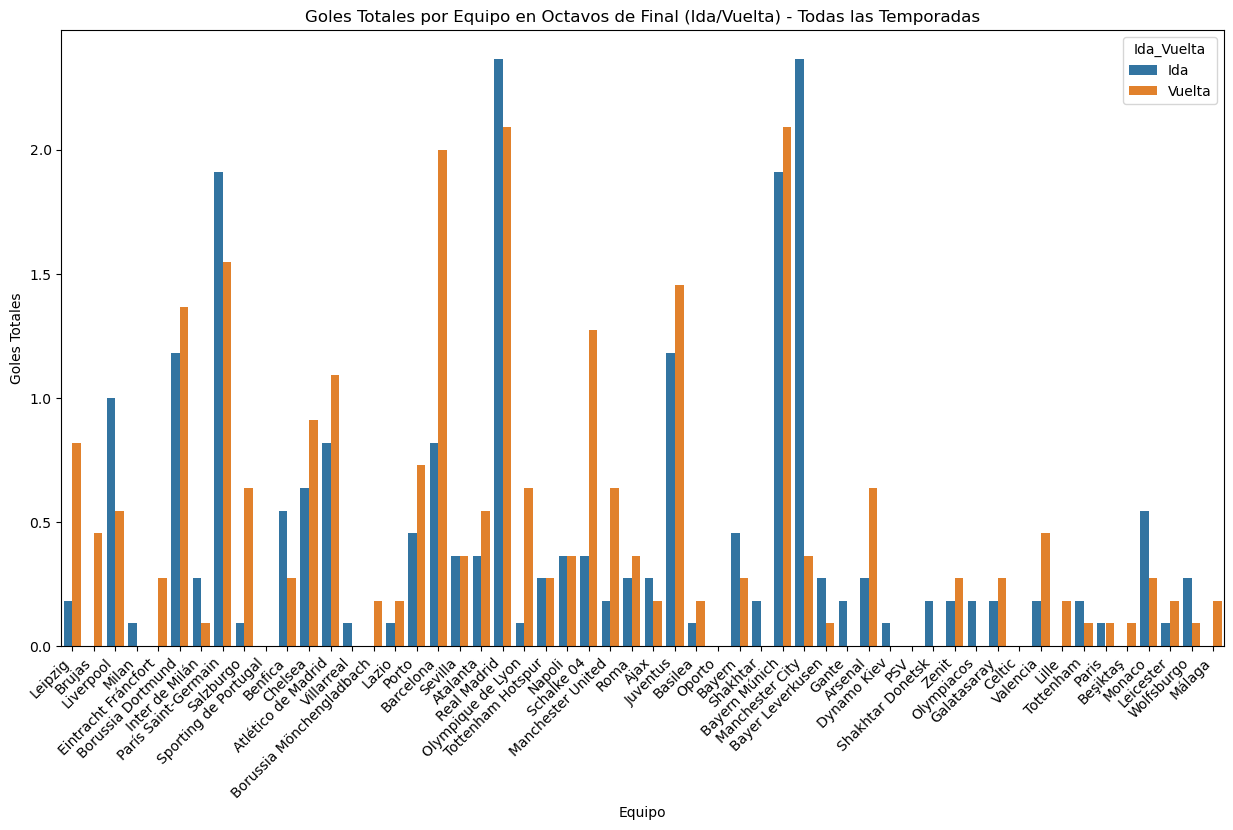

In [4]:
# Crear una lista con los nombres únicos de los equipos en las columnas 'Equipo 1' y 'Equipo 2'
equipos_unicos = pd.unique(df[['Equipo 1', 'Equipo 2']].values.ravel('K'))

# Inicializar un DataFrame para almacenar los goles totales por equipo e indicador de ida/vuelta
goles_totales_por_equipo = pd.DataFrame(columns=['Equipo', 'Temporada', 'Goles_totales', 'Ida_Vuelta'])

# Iterar sobre cada equipo único
for equipo in equipos_unicos:
    # Iterar sobre cada temporada
    for temporada in pd.unique(df['Temporada']):
        # Filtrar las filas donde el equipo está en 'Equipo 1'
        filas_equipo_1_ida = df[(df['Equipo 1'] == equipo) & (df['Temporada'] == temporada)]['goles_ida_1'].sum()
        filas_equipo_1_vuelta = df[(df['Equipo 1'] == equipo) & (df['Temporada'] == temporada)]['goles_vuelta_1'].sum()

        # Filtrar las filas donde el equipo está en 'Equipo 2'
        filas_equipo_2_ida = df[(df['Equipo 2'] == equipo) & (df['Temporada'] == temporada)]['goles_ida_2'].sum()
        filas_equipo_2_vuelta = df[(df['Equipo 2'] == equipo) & (df['Temporada'] == temporada)]['goles_vuelta_2'].sum()

        # Sumar los resultados en el DataFrame principal
        goles_totales_por_equipo = pd.concat([goles_totales_por_equipo,
                                              pd.DataFrame({'Equipo': [equipo],
                                                            'Temporada': [temporada],
                                                            'Goles_totales': [filas_equipo_1_ida + filas_equipo_2_ida],
                                                            'Ida_Vuelta': ['Ida']}),
                                              pd.DataFrame({'Equipo': [equipo],
                                                            'Temporada': [temporada],
                                                            'Goles_totales': [filas_equipo_1_vuelta + filas_equipo_2_vuelta],
                                                            'Ida_Vuelta': ['Vuelta']})])

# Graficar los goles totales por equipo en la ida y la vuelta
plt.figure(figsize=(15, 8))
sns.barplot(x='Equipo', y='Goles_totales', hue='Ida_Vuelta', data=goles_totales_por_equipo, ci=None)

plt.title('Goles Totales por Equipo en Octavos de Final (Ida/Vuelta) - Todas las Temporadas')
plt.xlabel('Equipo')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.show()


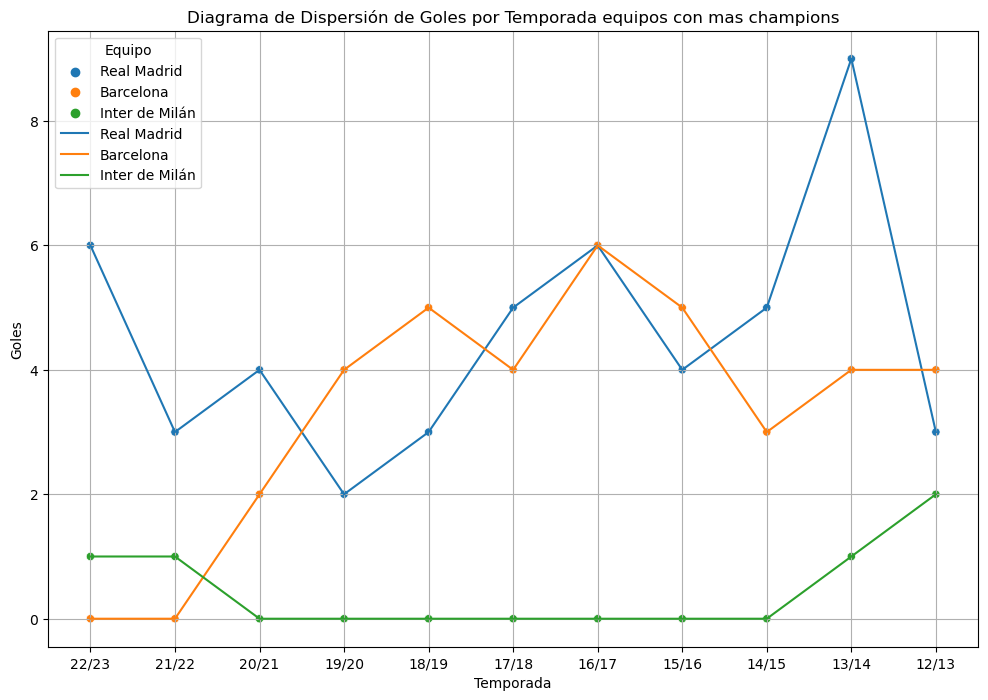

In [5]:
'''Diagrama de dispersión de goles por temporada de los tres equipos con mas champions'''
# Filtrar filas para los equipos específicos (Real Madrid, Bayern y Milan)
equipos_seleccionados = ['Real Madrid', 'Barcelona', 'Inter de Milán']
df_seleccionados = df[df['Equipo 1'].isin(equipos_seleccionados) | df['Equipo 2'].isin(equipos_seleccionados)]

# Crear un DataFrame para el diagrama de dispersión
df_dispersion = pd.DataFrame(columns=['Temporada', 'Equipo', 'Goles Totales'])

# Iterar sobre cada equipo y temporada
for equipo in equipos_seleccionados:
    for temporada in pd.unique(df_seleccionados['Temporada']):
        # Filtrar las filas donde el equipo está en 'Equipo 1'
        filas_equipo_1 = df_seleccionados[(df_seleccionados['Equipo 1'] == equipo) & (df_seleccionados['Temporada'] == temporada)]
        goles_totales_1 = filas_equipo_1['goles_1'].sum()

        # Filtrar las filas donde el equipo está en 'Equipo 2'
        filas_equipo_2 = df_seleccionados[(df_seleccionados['Equipo 2'] == equipo) & (df_seleccionados['Temporada'] == temporada)]
        goles_totales_2 = filas_equipo_2['goles_2'].sum()

        # Sumar los resultados en el DataFrame principal
        df_dispersion = pd.concat([df_dispersion,
                                  pd.DataFrame({'Temporada': [temporada],
                                                'Equipo': [equipo],
                                                'Goles Totales': [goles_totales_1 + goles_totales_2]})])

# Graficar el diagrama de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Temporada', y='Goles Totales', hue='Equipo', data=df_dispersion)
sns.lineplot(x='Temporada', y='Goles Totales', hue='Equipo', data=df_dispersion, style='Equipo', markers=False, dashes=False)
plt.title('Diagrama de Dispersión de Goles por Temporada equipos con mas champions')
plt.xlabel('Temporada')
plt.ylabel('Goles')
plt.legend(title='Equipo', loc='upper left')
plt.grid(True)
plt.show()

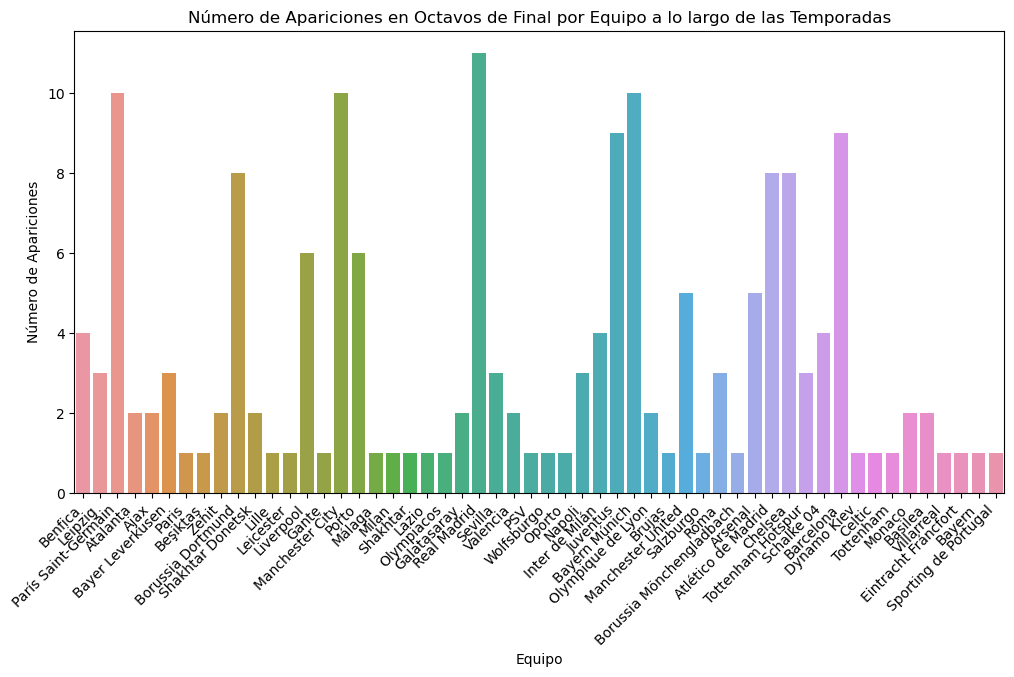

In [6]:
'''Histograma numero de apariciones en octavos'''
# Crear una lista con todos los equipos
equipos = df['Equipo 1'].tolist() + df['Equipo 2'].tolist()
equipos = list(set(equipos))  # Convertir a lista única

# Inicializar un diccionario para contar las apariciones de cada equipo
apariciones_por_equipo = {equipo: 0 for equipo in equipos}

# Contar las apariciones por equipo
for equipo in equipos:
    apariciones_por_equipo[equipo] = ((df['Equipo 1'] == equipo) | (df['Equipo 2'] == equipo)).sum()

# Crear un histograma
plt.figure(figsize=(12, 6))
sns.barplot(x=list(apariciones_por_equipo.keys()), y=list(apariciones_por_equipo.values()))
plt.title('Número de Apariciones en Octavos de Final por Equipo a lo largo de las Temporadas')
plt.xlabel('Equipo')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=45, ha='right')
plt.show()